# IMinuit

Minuit - программа численной минимизации функций многих переменных, широко применяемая в физике элементарных частиц. Есть два питонских интерфейса, PyMinuit и IMinuit (он особенно удобен в ipython).

In [1]:
from iminuit import Minuit
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Простой пример

Определим квадратичную функцию от двух параметров.

In [2]:
def f(a,b):
    return 10*a**2+10*b**2-16*a*b+12*a-24*b

Создадим объект класса `Minuit`. `a` и `b` - грубые догадки, около чего надо искать минимум; `error_a` и `error_b` - оценки точности этих догадок (в начале минимизации программа будет делать шаги порядка этих величин, потом они будут уменьшаться). Пределы изменения задавать не обязательно. Валичина `errordef` показывает, насколько функция должна быть выше своего минимума, чтобы это считалось отклонением на одну сигму; поскольку минимизируемая функция - это, как правило, $\chi^2$, значение 1 по умолчанию вполне годится.

In [3]:
m=Minuit(f,a=0,error_a=1,limit_a=(-10,10),
         b=0,error_b=1,limit_b=(-10,10))

/usr/lib64/python3.4/site-packages/ipykernel/__main__.py:2: InitialParamWarning: errordef is not given. Default to 1.
  from ipykernel import kernelapp as app


Наиболее популярный метод минимизации - `migrad`.

In [4]:
m.migrad()

FCN = -17.999997281186666 
 TOTAL NCALL = 36 
 NCALLS = 36 
 
 
 EDM = 2.7187527367825896e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 a 
 0.999823 
 0.526788 
 0 
 0 
 -10.0 
 10.0 
 
 
 
 
 2 
 b 
 1.99935 
 0.526776 
 0 
 0 
 -10.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & a & 9.998e-01 & 5.268e-01 & & & -1.000e+01 & 1.000e+01 & \\
\hline
2 & b & 1.999e+00 & 5.268e-01 & & & -1.000e+01 & 1.000e+01 & \\
\hline
\end{tabular}

({'fval': -17.999997281186666, 'up': 1.0, 'is_above_max_edm': False, 'has_valid_parameters': True, 'edm': 2.7187527367825896e-06, 'has_made_posdef_covar': False, 'has_covariance': True, 'has_posdef_covar': True, 'nfcn': 36, 'has_accurate_covar': True, 'hesse_failed': False, 'is_valid': True, 'has_reached_call_limit': False},
 [{'is_const': False, 'number': 0, 'upper_limit': 10.0, 'lower_limit': -10.0, 'name': 'a', 'is_fixed': False, 'error': 0.5267876810263843, 'value': 0.9998227792225478, 'has_upper_limit': True, 'has_limits': True, 'has_lower_limit': True},
  {'is_const': False, 'number': 1, 'upper_limit': 10.0, 'lower_limit': -10.0, 'name': 'b', 'is_fixed': False, 'error': 0.5267762744877214, 'value': 1.9993477581584944, 'has_upper_limit': True, 'has_limits': True, 'has_lower_limit': True}])

Значения параметров.

In [5]:
m.values

{'a': 0.9998227792225478, 'b': 1.9993477581584944}

Значение функции в точке минимума.

In [6]:
m.fval

-17.999997281186666

Ошибки параметров.

In [7]:
m.errors

{'a': 0.5267876810263843, 'b': 0.5267762744877214}

Если, скажем, `a` - наш окончательный физический результат, то мы напишем в статье $a=1\pm0.5$. На самом деле у нас есть больше информации, поскольку ошибки `a` и `b` сильно скоррелированы. Матрица корреляции ошибок:

In [8]:
m.matrix()

((0.27776493841711364, 0.22220727646667665),
 (0.22220727646667665, 0.27776101882046583))

Минимизация квадратичной формы сводится к решению системы линейных уравнений, а матрица корреляции ошибок - обратная матрица этой системы. В таком простом случае не имеет смысла использовать инструмент минимизации произвольных функций, такой, как Minuit.

In [9]:
M=array([[10.,-8.],[-8.,10.]])
M=inv(M)
M

array([[ 0.27777778,  0.22222222],
       [ 0.22222222,  0.27777778]])

In [10]:
M.dot(array([[-6],[12]]))

array([[ 1.],
       [ 2.]])

Нарисуем контуры, соответствующие отклонению на 1, 2 и 3 сигмы от оптимальной точки.

(array([-1.03835166, -0.997266  , -0.95618035, -0.9150947 , -0.87400905,
        -0.8329234 , -0.79183775, -0.7507521 , -0.70966645, -0.6685808 ,
        -0.62749514, -0.58640949, -0.54532384, -0.50423819, -0.46315254,
        -0.42206689, -0.38098124, -0.33989559, -0.29880994, -0.25772428,
        -0.21663863, -0.17555298, -0.13446733, -0.09338168, -0.05229603,
        -0.01121038,  0.02987527,  0.07096092,  0.11204657,  0.15313223,
         0.19421788,  0.23530353,  0.27638918,  0.31747483,  0.35856048,
         0.39964613,  0.44073178,  0.48181743,  0.52290309,  0.56398874,
         0.60507439,  0.64616004,  0.68724569,  0.72833134,  0.76941699,
         0.81050264,  0.85158829,  0.89267395,  0.9337596 ,  0.97484525,
         1.0159309 ,  1.05701655,  1.0981022 ,  1.13918785,  1.1802735 ,
         1.22135915,  1.26244481,  1.30353046,  1.34461611,  1.38570176,
         1.42678741,  1.46787306,  1.50895871,  1.55004436,  1.59113001,
         1.63221567,  1.67330132,  1.71438697,  1.7

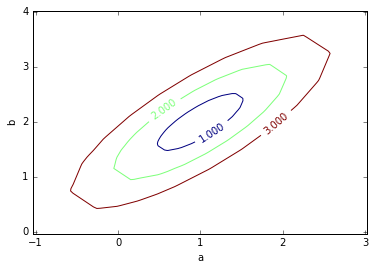

In [11]:
m.draw_mncontour('a','b',nsigma=3)

То же в виде цветов.

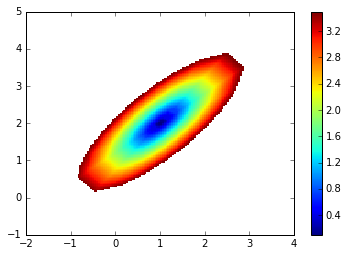

In [12]:
a,b,g,r=m.mncontour_grid('a','b',nsigma=3)
pcolormesh(a,b,g)
colorbar()

## Дайте мне 3 параметра, и я профитирую слона. С 4 параметрами он будет махать хоботом.

Пусть у нас есть экспериментальные данные, и мы хотим профитировать их прямой.

In [13]:
def fit(a,b,x):
    return a*x+b

Данные не настоящие, а сгенерированные. Все имеют ошибки 0.1.

In [14]:
x=linspace(0,1,11)
dy=0.1*ones(11)
y=x+dy*normal(size=11)

Функция $\chi^2$.

In [15]:
def chi2(a,b):
    global x,y,dy
    return (((y-fit(a,b,x))/dy)**2).sum()

Минимизируем.

In [16]:
m=Minuit(chi2,a=0,b=0,error_a=1,error_b=1)

/usr/lib64/python3.4/site-packages/ipykernel/__main__.py:1: InitialParamWarning: errordef is not given. Default to 1.
  if __name__ == '__main__':


In [17]:
m.migrad()

FCN = 7.341081582910074 
 TOTAL NCALL = 32 
 NCALLS = 32 
 
 
 EDM = 6.20027421166483e-24 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 a 
 0.952919 
 0.0953463 
 0 
 0 
 
 
 
 
 
 
 2 
 b 
 -0.0578366 
 0.0564076 
 0 
 0 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & a & 9.529e-01 & 9.535e-02 & & & & & \\
\hline
2 & b & -5.784e-02 & 5.641e-02 & & & & & \\
\hline
\end{tabular}

({'fval': 7.341081582910074, 'up': 1.0, 'is_above_max_edm': False, 'has_valid_parameters': True, 'edm': 6.20027421166483e-24, 'has_made_posdef_covar': False, 'has_covariance': True, 'has_posdef_covar': True, 'nfcn': 32, 'has_accurate_covar': True, 'hesse_failed': False, 'is_valid': True, 'has_reached_call_limit': False},
 [{'is_const': False, 'number': 0, 'upper_limit': 0.0, 'lower_limit': 0.0, 'name': 'a', 'is_fixed': False, 'error': 0.0953462587249722, 'value': 0.9529192501482413, 'has_upper_limit': False, 'has_limits': False, 'has_lower_limit': False},
  {'is_const': False, 'number': 1, 'upper_limit': 0.0, 'lower_limit': 0.0, 'name': 'b', 'is_fixed': False, 'error': 0.05640760738050268, 'value': -0.0578365609047049, 'has_upper_limit': False, 'has_limits': False, 'has_lower_limit': False}])

In [18]:
m.values

{'a': 0.9529192501482413, 'b': -0.0578365609047049}

In [19]:
m.fval

7.341081582910074

In [22]:
m.matrix()

((0.009090909052849335, -0.004545454524510073),
 (-0.004545454524510073, 0.003181818170392941))

(array([ 0.58416759,  0.59160027,  0.59903294,  0.60646562,  0.61389829,
         0.62133097,  0.62876364,  0.63619631,  0.64362899,  0.65106166,
         0.65849434,  0.66592701,  0.67335969,  0.68079236,  0.68822503,
         0.69565771,  0.70309038,  0.71052306,  0.71795573,  0.7253884 ,
         0.73282108,  0.74025375,  0.74768643,  0.7551191 ,  0.76255178,
         0.76998445,  0.77741712,  0.7848498 ,  0.79228247,  0.79971515,
         0.80714782,  0.8145805 ,  0.82201317,  0.82944584,  0.83687852,
         0.84431119,  0.85174387,  0.85917654,  0.86660922,  0.87404189,
         0.88147456,  0.88890724,  0.89633991,  0.90377259,  0.91120526,
         0.91863794,  0.92607061,  0.93350328,  0.94093596,  0.94836863,
         0.95580131,  0.96323398,  0.97066666,  0.97809933,  0.985532  ,
         0.99296468,  1.00039735,  1.00783003,  1.0152627 ,  1.02269538,
         1.03012805,  1.03756072,  1.0449934 ,  1.05242607,  1.05985875,
         1.06729142,  1.0747241 ,  1.08215677,  1.0

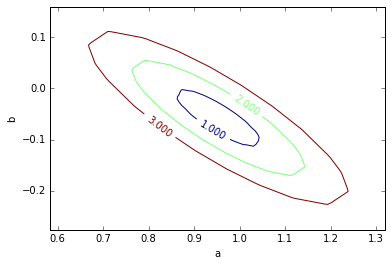

In [20]:
m.draw_mncontour('a','b',nsigma=3)

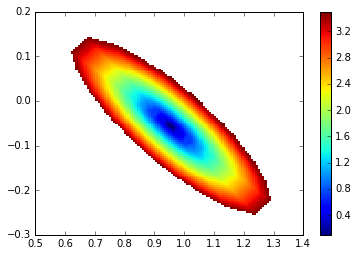

In [23]:
a,b,g,r=m.mncontour_grid('a','b',nsigma=3)
pcolormesh(a,b,g)
colorbar()

Нарисуем на одном графике экспериментальные точки, наш фит (сплошная линия) и истинную теоретическую кривую (пунктир).

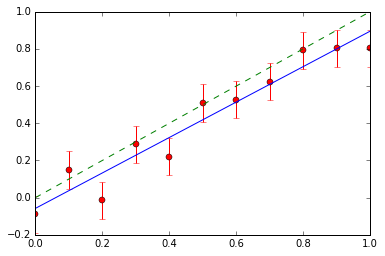

In [24]:
errorbar(x,y,dy,fmt='ro')
xt=linspace(0,1,101)
plot(xt,fit(m.values['a'],m.values['b'],xt),'b-')
plot(xt,fit(1,0,xt),'g--')

Когда фитирующая функция есть линейная комбинация каких-то фиксированных функций с неизвестными коэффициентами, минимизация $\chi^2$ сводится к решению системы линейных уравнений. Нет надобности использовать Minuit.

## Резонанс без фона

Пусть теперь наша фитирующая функция - Брейт-Вигнеровский резонанс (без фона), с двумя параметрами - положением и шириной (лучше бы ввести третий - высоту, но я не стал этого делать для простоты). Теперь $\chi^2$ - сложная нелинейная функция параметров.

In [25]:
def fit(x0,Gamma,x):
    return 1/((x-x0)**2+Gamma**2)

Вот наши экспериментальные данные (с ошибками 0.1).

In [26]:
x=linspace(-3,3,21)
dy=0.1*ones(21)
y=fit(0,1,x)+dy*normal(size=21)

Минимизируем $\chi^2$.

In [27]:
def chi2(x0,Gamma):
    global x,y,dy
    return (((y-fit(x0,Gamma,x))/dy)**2).sum()

In [28]:
m=Minuit(chi2,x0=0,error_x0=1,Gamma=1,error_Gamma=1)

/usr/lib64/python3.4/site-packages/ipykernel/__main__.py:1: InitialParamWarning: errordef is not given. Default to 1.
  if __name__ == '__main__':


In [29]:
m.migrad()

FCN = 18.097376960150946 
 TOTAL NCALL = 33 
 NCALLS = 33 
 
 
 EDM = 1.7129910452155893e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 x0 
 -0.0351926 
 0.0673422 
 0 
 0 
 
 
 
 
 
 
 2 
 Gamma 
 1.03425 
 0.0300784 
 0 
 0 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & x0 & -3.519e-02 & 6.734e-02 & & & & & \\
\hline
2 & $\Gamma$ & 1.034e+00 & 3.008e-02 & & & & & \\
\hline
\end{tabular}

({'fval': 18.097376960150946, 'up': 1.0, 'is_above_max_edm': False, 'has_valid_parameters': True, 'edm': 1.7129910452155893e-07, 'has_made_posdef_covar': False, 'has_covariance': True, 'has_posdef_covar': True, 'nfcn': 33, 'has_accurate_covar': True, 'hesse_failed': False, 'is_valid': True, 'has_reached_call_limit': False},
 [{'is_const': False, 'number': 0, 'upper_limit': 0.0, 'lower_limit': 0.0, 'name': 'x0', 'is_fixed': False, 'error': 0.06734219710972826, 'value': -0.0351926437845268, 'has_upper_limit': False, 'has_limits': False, 'has_lower_limit': False},
  {'is_const': False, 'number': 1, 'upper_limit': 0.0, 'lower_limit': 0.0, 'name': 'Gamma', 'is_fixed': False, 'error': 0.030078423287488033, 'value': 1.034253164644145, 'has_upper_limit': False, 'has_limits': False, 'has_lower_limit': False}])

In [30]:
m.values

{'Gamma': 1.034253164644145, 'x0': -0.0351926437845268}

In [31]:
m.fval

18.097376960150946

In [32]:
m.errors

{'Gamma': 0.030078423287488033, 'x0': 0.06734219710972826}

In [33]:
m.matrix()

((0.004534971511565494, -2.272188453114644e-05),
 (-2.272188453114644e-05, 0.0009047115474613024))

(array([-0.30116278, -0.29582729, -0.29049181, -0.28515632, -0.27982084,
        -0.27448535, -0.26914986, -0.26381438, -0.25847889, -0.25314341,
        -0.24780792, -0.24247243, -0.23713695, -0.23180146, -0.22646597,
        -0.22113049, -0.215795  , -0.21045952, -0.20512403, -0.19978854,
        -0.19445306, -0.18911757, -0.18378208, -0.1784466 , -0.17311111,
        -0.16777563, -0.16244014, -0.15710465, -0.15176917, -0.14643368,
        -0.14109819, -0.13576271, -0.13042722, -0.12509174, -0.11975625,
        -0.11442076, -0.10908528, -0.10374979, -0.0984143 , -0.09307882,
        -0.08774333, -0.08240785, -0.07707236, -0.07173687, -0.06640139,
        -0.0610659 , -0.05573041, -0.05039493, -0.04505944, -0.03972396,
        -0.03438847, -0.02905298, -0.0237175 , -0.01838201, -0.01304653,
        -0.00771104, -0.00237555,  0.00295993,  0.00829542,  0.01363091,
         0.01896639,  0.02430188,  0.02963736,  0.03497285,  0.04030834,
         0.04564382,  0.05097931,  0.0563148 ,  0.0

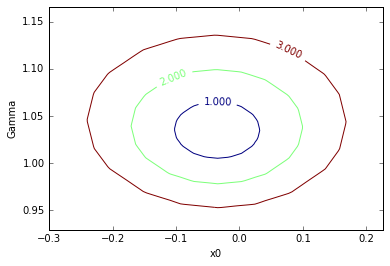

In [34]:
m.draw_mncontour('x0','Gamma',nsigma=3)

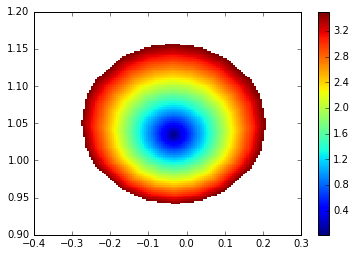

In [35]:
x0,Gamma,g,r=m.mncontour_grid('x0','Gamma',nsigma=3)
pcolormesh(x0,Gamma,g)
colorbar()

Теперь контуры постоянной высоты $\chi^2$ - уже не симметричные эллипсы с центром в оптимальной точке, а какие-то сложные кривые. Ошибки положения и ширины резонанса довольно-таки независимы.

Нарисуем на одном графике экспериментальные точки, наш фит (сплошная линия) и истинную теоретическую кривую (пунктир).

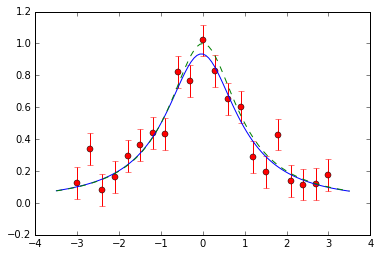

In [36]:
errorbar(x,y,dy,fmt='ro')
xt=linspace(-3.5,3.5,101)
plot(xt,fit(m.values['x0'],m.values['Gamma'],xt),'b-')
plot(xt,fit(0,1,xt),'g--')